                            0
2000-01-01 00:00:00  3.736798
2000-01-01 01:00:00  3.702789
2000-01-01 02:00:00  3.614095
2000-01-01 03:00:00  3.487340
2000-01-01 04:00:00  3.319650
...                       ...
2010-12-28 19:00:00  3.072658
2010-12-28 20:00:00  3.166721
2010-12-28 21:00:00  3.210086
2010-12-28 22:00:00  3.173105
2010-12-28 23:00:00  3.082166

[96360 rows x 1 columns]


C:\Users\Sharavi\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


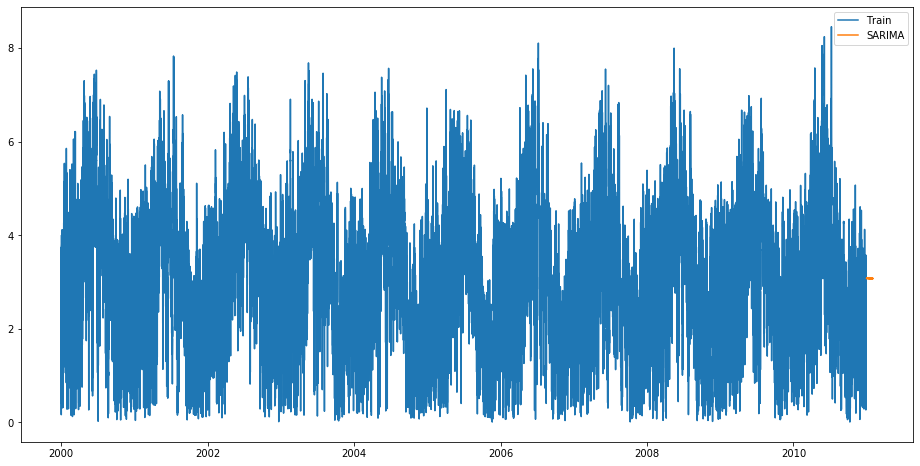

In [38]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

time = pd.date_range('1/1/2000', periods=96360, freq='60min')

series = read_csv('graph.csv',header=None)
series.index=time

series = pd.DataFrame(series)
# series.plot()
# pyplot.show()

print(series)



#figure, axes = pyplot.subplots(figsize = (18,10))

# axes.plot(np.arange(0,96360), result.observed, 'b')
# axes.set_xlabel('Time (Hourly data from 2000-10)')
# axes.set_ylabel('Wind speed (w/sq.m)')
# axes.set_title('Actual_Data')

# axes.plot(np.arange(0,96360), result.trend, 'b')
# axes.set_xlabel('Time')
# axes.set_ylabel('Trend')
# axes.set_title('Trend_Component')

# axes.plot(np.arange(0,96360), result.seasonal, 'b')
# axes.set_xlabel('Time')
# axes.set_ylabel('Seasonal')
# axes.set_title('Seasnal_Component')

# axes.plot(np.arange(0,96360), result.resid, 'b')
# axes.set_xlabel('Time')
# axes.set_ylabel('Residual')
# axes.set_title('Residual_Component')

# model = ARIMA(series, order=(1, 1, 1))
# model_fit = model.fit(disp=False)
# # make prediction
# yhat = model_fit.predict(len(series), len(series), typ='levels')
# print(yhat)



#y_hat_avg = test.copy()
fit1 = SARIMAX(series, order=(0, 1, 0),seasonal_order=(0,1,1,10)).fit()
y_hat_avg = fit1.predict(start="2011-01-01 00:00:00", end="2011-01-31 23:00:00", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( series[0], label='Train')
#plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg, label='SARIMA')
plt.legend(loc='best')
plt.show()

In [37]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

time = pd.date_range('1/1/2000', periods=96360, freq='60min')

y = read_csv('graph.csv',header=None)
y = pd.Series(y, index = time)
#y.index = time
arma_mod = sm.tsa.ARMA(y, order=(1,2))
arma_res = arma_mod.fit(trend='nc',disp=-1)

print(arma_res.summary())

TypeError: 'int' object is not iterable

In [28]:
y.tail()
# y.head()

,0
2010-12-28 19:00:00,3.072658
2010-12-28 20:00:00,3.166721
2010-12-28 21:00:00,3.210086
2010-12-28 22:00:00,3.173105
2010-12-28 23:00:00,3.082166


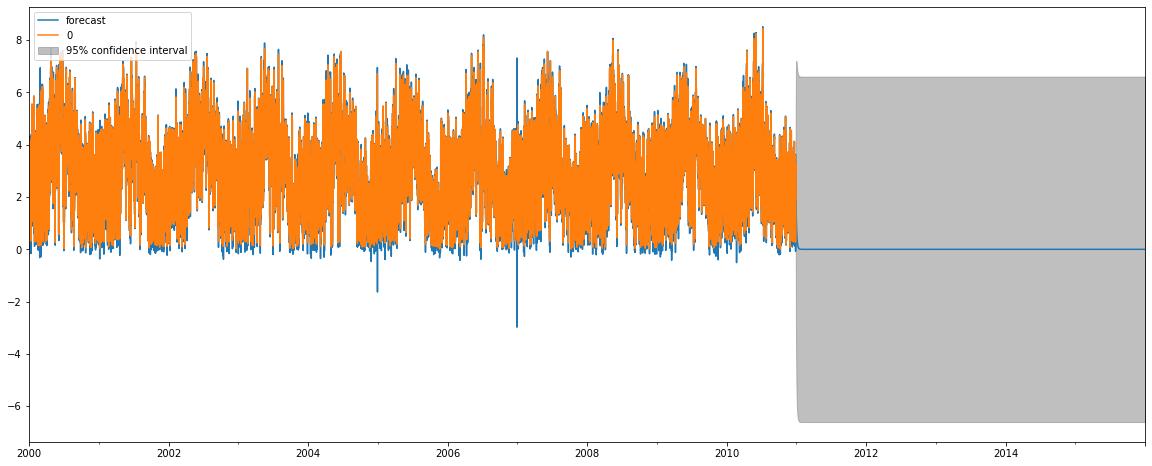

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,8))
fig=arma_res.plot_predict(start='2000-01-01 00:00:00',end='2015-12-31 23:00:00',ax=ax)
legend=ax.legend(loc='upper left')